## EDA on RETAIL SALES DATA :

<b>Description:</b> In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.


<b>Key Concepts and Challenges:</b></br>
1.) Data Loading and Cleaning: Load the retail sales dataset.</br>
2.) Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).</br>
3.) Time Series Analysis: Analyze sales trends over time using time series techniques.</br>
4.) Customer and Product Analysis: Analyze customer demographics and purchasing behavior.</br>
5.) Visualization: Present insights through bar charts, line plots, and heatmaps.</br>
6.) Recommendations: Provide actionable recommendations based on the EDA.</br>


#### Import Libraries :

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Read the Dataset


In [51]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


#### Data PreProcessing :

In [52]:
## Check for Missing_Values

df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [53]:
## Checking Datatypes of the Columns :

df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [54]:
## Changing Datatype of column 'DATE' / Converting Date column format into Datetime format  : 

df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [55]:
## Set Transaction_ID as index of dataframe :

df.set_index('Date', inplace=True)
df = df.sort_index()

#### Basic Statistics Inferences :

In [56]:
## Calculate basic statistics for numerical columns (Count, Mean, Median, Standard Deviation).

df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [57]:
## Also, Calculating Mean, Median, Mode & Std dev for specific columns :

print('Mode of Gender: ', df['Gender'].mode()[0])
print('Mode of Product_Category: ', df['Product Category'].mode()[0])
print('Median Age: ', df['Age'].median())
print('Std Dev of Total Amount: ', df['Total Amount'].std())

Mode of Gender:  Female
Mode of Product_Category:  Clothing
Median Age:  42.0
Std Dev of Total Amount:  559.997631555123


### TIME SERIES ANALYSIS :

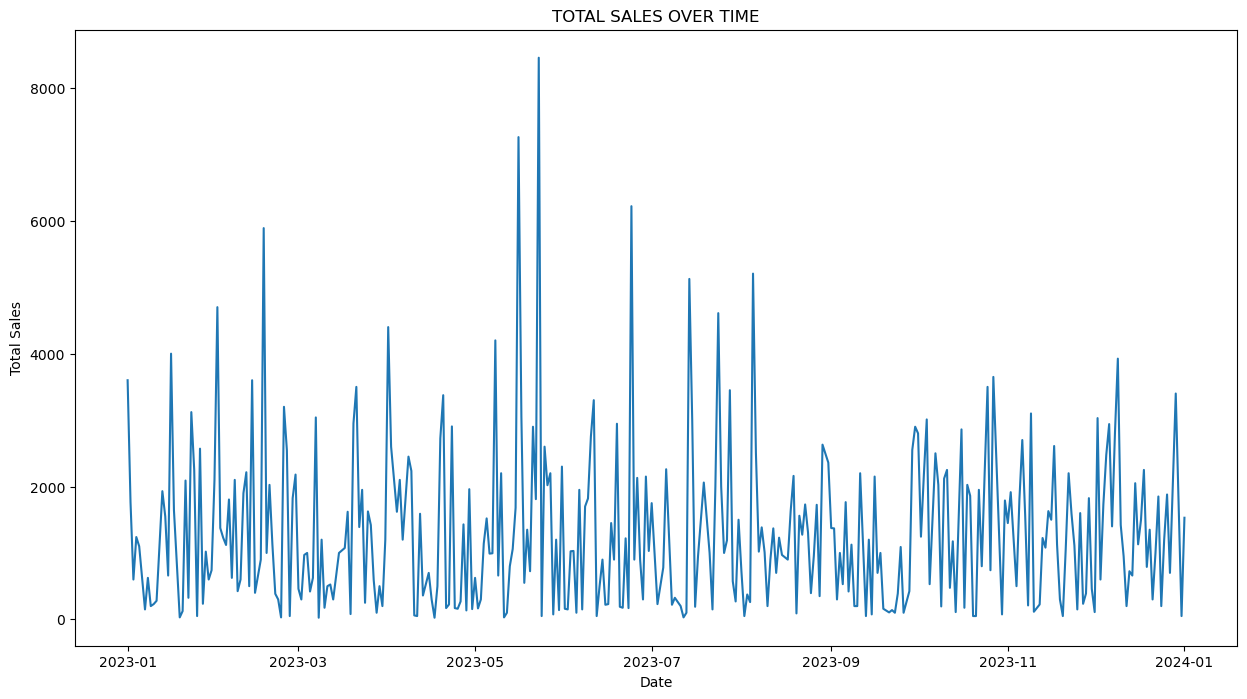

In [58]:
## Calculate Total Sales over time and plot it: 

Daily_Sales = df.groupby('Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Total Amount', data=Daily_Sales)
plt.title('TOTAL SALES OVER TIME')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Monthly_Sales:  Date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: M, Name: Total Amount, dtype: int64


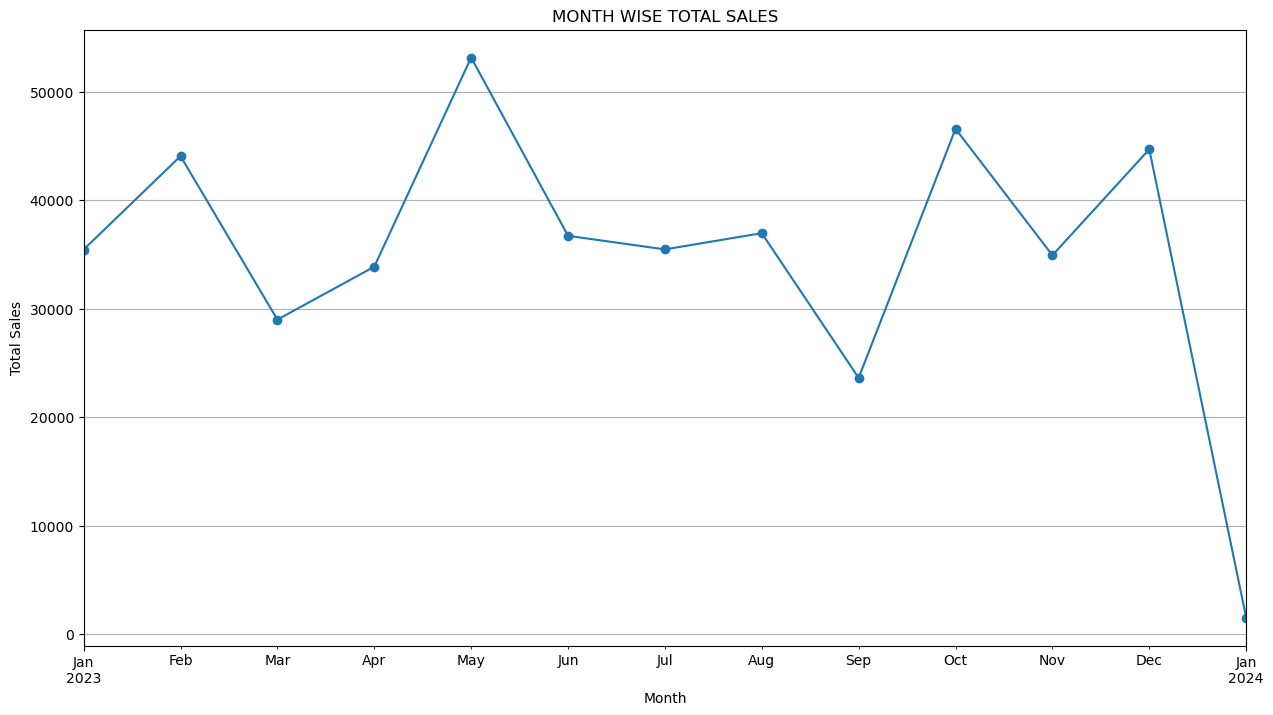

In [96]:
## Calculate Monthly Sales :

Monthly_Sales = df['Total Amount'].resample('M').sum()
print('Monthly_Sales: ',Monthly_Sales)

## Visualisation :
plt.figure(figsize=(15,8))
Monthly_Sales.plot(marker='o', linestyle='-')
plt.title('MONTH WISE TOTAL SALES')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### Customer and Product Analysis & Visualization :

dis_cust_by_gender: Gender
Female    510
Male      490
Name: Customer ID, dtype: int64


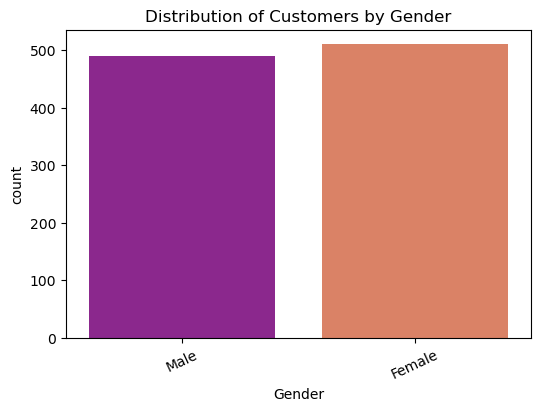

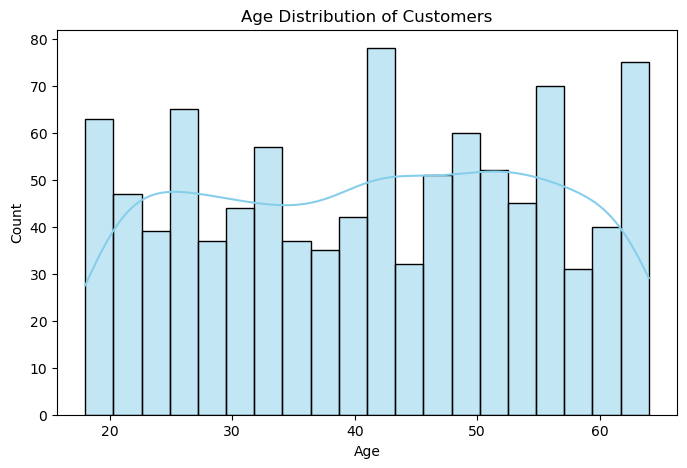

In [104]:
## Analyse Customer Demographics and Purchasing Behaviour :

dis_cust_by_gender = df.groupby('Gender')['Customer ID'].nunique()
print('dis_cust_by_gender:', dis_cust_by_gender)


## Visualisation
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='plasma')
plt.title('Distribution of Customers by Gender')
plt.xticks(rotation=25)
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.show()

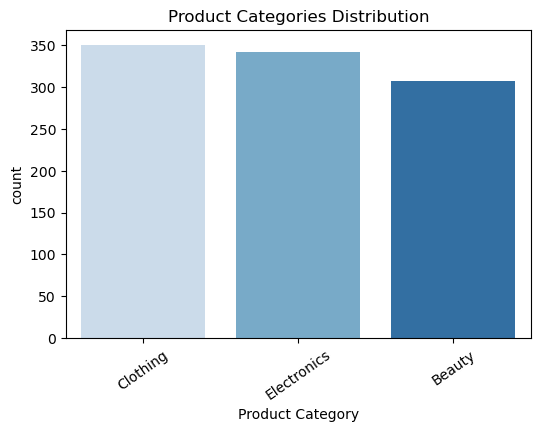

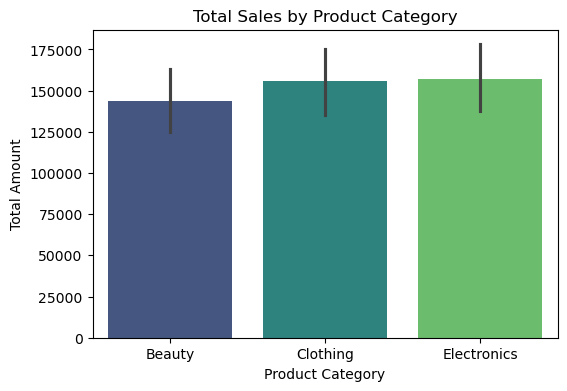

In [118]:
## Analyse Product Categories :

plt.figure(figsize=(6,4))
sns.countplot(x='Product Category', data=df, order=df['Product Category'].value_counts().index, palette='Blues')
plt.title('Product Categories Distribution')
plt.xticks(rotation=35)
plt.show()


## Total Sales by Product Category :

plt.figure(figsize=(6,4))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=np.sum, palette='viridis')
plt.title('Total Sales by Product Category')
plt.show()

avg_spend_gender Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


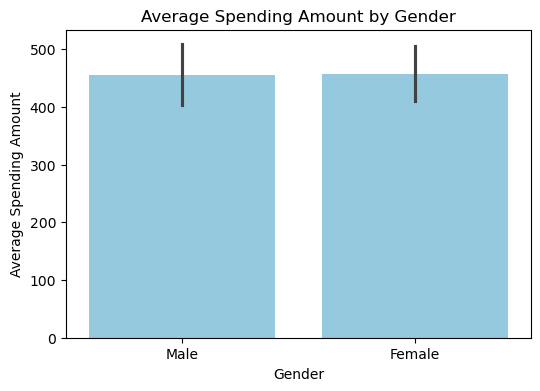

In [121]:
## Analyse Gender wise Average Amount spent :

avg_spend_gender = df.groupby('Gender')['Total Amount'].mean()
print('avg_spend_gender', avg_spend_gender)


## Visualisation :
plt.figure(figsize=(6,4))
sns.barplot(x='Gender', y='Total Amount', data=df, estimator=np.mean, color='skyblue')
plt.title('Average Spending Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Spending Amount')
plt.show()

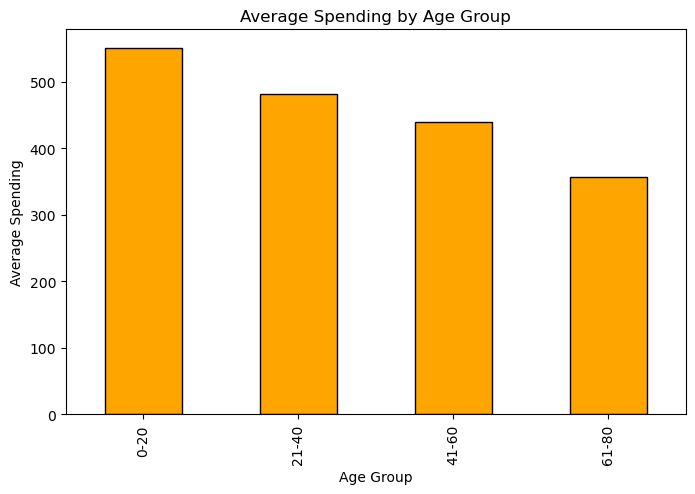

In [124]:
## Average Spending by Age Group :

df['Age Group'] = pd.cut(df['Age'],bins=[0,20,40,60,80], labels=['0-20', '21-40', '41-60', '61-80'])

Age_Group_Spending = df.groupby('Age Group', observed=False)['Total Amount'].mean().sort_index()

plt.figure(figsize=(8,5))
Age_Group_Spending.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.show()

#### Customer Segmentation Analysis :


Top 5 Customers:  Customer ID
CUST487    2000
CUST476    2000
CUST773    2000
CUST503    2000
CUST093    2000
Name: Total Amount, dtype: int64


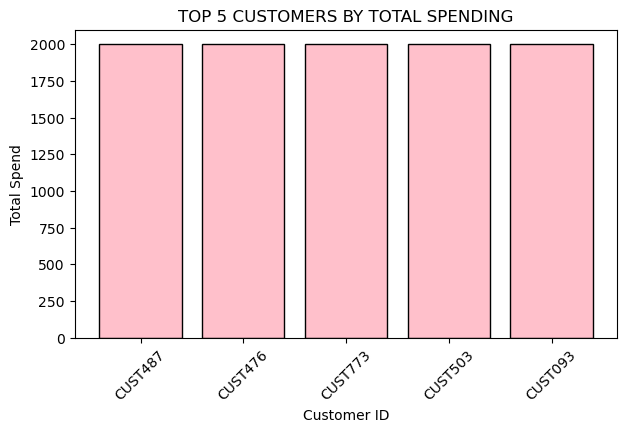

In [109]:
## TOP 5 CUSTOMERS BY TOTAL SPENDING :
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(5)
print('Top 5 Customers: ',top_customers)

plt.figure(figsize=(7,4))
plt.bar(x=top_customers.index, height=top_customers.values, color='pink', edgecolor='black')
plt.title('TOP 5 CUSTOMERS BY TOTAL SPENDING')
plt.xlabel('Customer ID')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.show()

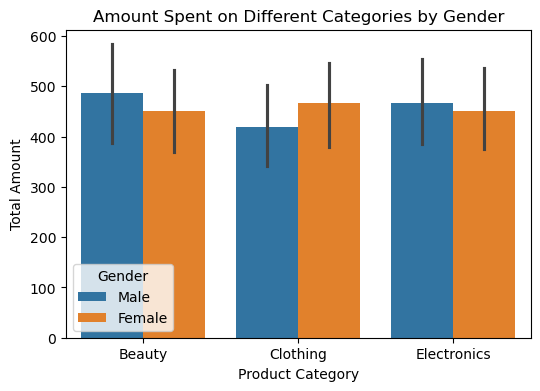

In [110]:
## Amount Spent on Different Categories by Gender :

plt.figure(figsize=(6,4))
sns.barplot(x='Product Category', y='Total Amount', hue='Gender', data=df)
plt.title('Amount Spent on Different Categories by Gender')
plt.show()

#### Correlation Analysis :

In [111]:
## Seperate Numerical Columns for Correlation Analysis :

num_cols = df.select_dtypes(include='int64')
num_cols

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
Date,,,,,
2023-01-01,522,46,3,500,1500
2023-01-01,180,41,3,300,900
2023-01-01,559,40,4,300,1200
2023-01-02,303,19,3,30,90
2023-01-02,979,19,1,25,25
...,...,...,...,...,...
2023-12-29,233,51,2,300,600
2023-12-29,805,30,3,500,1500
2023-12-31,857,60,2,25,50


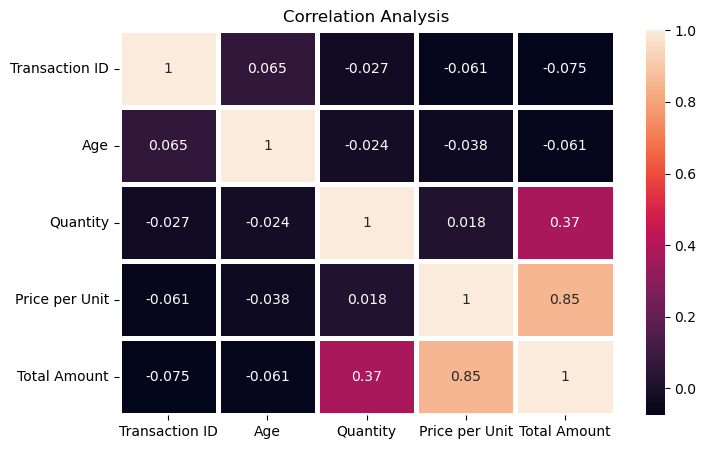

In [112]:
## Plot a Heatmap to find correlation or relationship between numerical_cols :

plt.figure(figsize=(8,5))
sns.heatmap(num_cols.corr(), annot=True, linewidth=2.5)
plt.title('Correlation Analysis')
plt.show()

In [113]:
## print(sns.__version__)

In [114]:
## pip install --upgrade seaborn
## print(sns.__version__)

In [116]:
def provide_suggestions(df):
    
    Underperforming_Category = df.groupby('Product Category')['Total Amount'].sum().idxmin()
    print('Consider promoting this product to boost the sales: ', Underperforming_Category)

provide_suggestions(df)

Consider promoting this product to boost the sales:  Beauty


### SOME KEY INSIGHTS & RECOMMENDATIONS :

Based on the insights derived from the analysis, here are some recommendations:

1.	<b>Sales Strategies.</b> Peak-Period Promotions: The monthly sales trends show spikes in certain months. Target these peak months (e.g., May and October) with promotions or special events to capitalize on naturally higher consumer interest. Off-Peak Marketing: Strengthen marketing efforts during lower sales months, like September and January, with seasonal discounts or holiday campaigns to boost sales.

2.	<b>Age-Based Customer Engagement.</b> Focus on Age 20-30 and 40-60 Segments: The age distribution chart indicates a solid representation across all age groups, with peaks in this age range. Design marketing content that appeals specifically to these age brackets, such as trendy items for younger customers and practical, value-driven products for adults/old aged. Age Group Promotions: Create targeted discounts for age groups with lower average spending (e.g., 30-40 age group) to encourage higher spending.

3.	<b>Product Category Focus.</b> While Clothing is the best-selling category in terms of Quantity, Electronics generates the Most Revenue, closely followed by Clothing. So, there is a need to sell more expensive electronics and offer good services as people spend more money on electronics than anything else. Also, boost Clothing sales by offering special deals or suggest some extra items like "BUY 1 GET 1 FREE". There is a need to find out what people want in Beauty products, sell more different kind of beauty products that women demands.
   
4.	<b>Gender-Based Marketing.</b> The gender distribution chart shows an almost equal split between Male and Female customers. Create inclusive campaigns that cater to both genders equally to maximize engagement. Gender-Specific Offers: such as promoting clothing items more to females if they purchase them more frequently.

5.	<b>Spending Habits by Age.</b> High-Spending Age Groups: The average spending chart suggests consistent spending across age groups, with slightly higher amounts for ages 10-40. Target these high-spending age groups with exclusive promotions or early access to new product launches. Encouraging Higher Spending: Introduce loyalty rewards or spend-and-save programs aimed at age groups with lower average spending (e.g., 40-60 and 60+).
		
6.	<b>Seasonal and Targeted Promotions.</b> The drop in December could be addressed with pre-holiday sales events to incentivize early shopping. Use insights from monthly trends to introduce flash sales during slower months to increase customer interest and purchases. Always keep a check what people are demanding in the market.